In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Data pre-pocessing
data = pd.read_csv("test_sample.csv", lineterminator='\n')
data['created_time'] = pd.to_datetime(data['created_time'], errors='coerce') # convert to a pandas datetime object

In [93]:
print("Basic Information:")
print(data.info())
print("\nSample Data:")
print(data.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   platform         10000 non-null  object             
 1   account_id       10000 non-null  object             
 2   id               10000 non-null  object             
 3   created_time     10000 non-null  datetime64[ns, UTC]
 4   text_original    7613 non-null   object             
 5   text_additional  3 non-null      object             
 6   likes_count      9998 non-null   float64            
 7   shares_count     5000 non-null   float64            
 8   comments_count   9955 non-null   float64            
 9   views_count      5621 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 781.4+ KB
None

Sample Data:
    platform   account_id           id              created_time  \
0  Instagram

In [110]:
missing_values = data.isnull().mean().sort_values(ascending=False) * 100 
print("\nPercentage of Missing Values:")
missing_values


Percentage of Missing Values:


text_additional    99.97
shares_count       50.00
views_count        43.79
text_original      23.87
comments_count      0.45
likes_count         0.02
platform            0.00
account_id          0.00
id                  0.00
created_time        0.00
dtype: float64

C:\Users\sasha\AppData\Local\Temp\ipykernel_19336\1194008145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


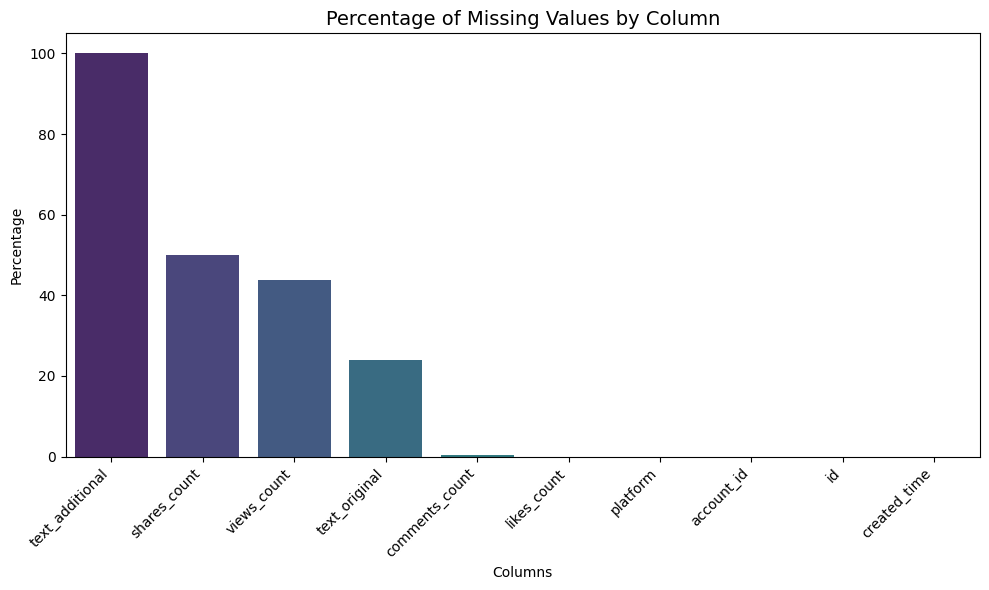

In [114]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Percentage of Missing Values by Column", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

In [104]:
# Summary Statistics for Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_stats = data[numerical_columns].describe()

print("\nSummary Statistics:")
print(numerical_stats)


Summary Statistics:
         likes_count  shares_count  comments_count   views_count
count    9998.000000   5000.000000     9955.000000  5.621000e+03
mean     1416.641928     79.232000      299.793872  1.797353e+04
std      5981.971791    979.564848     1257.022415  1.012492e+05
min         0.000000      0.000000        0.000000  3.000000e+00
25%       116.250000      3.000000       28.000000  1.539000e+03
50%       356.000000      9.000000       93.000000  3.704000e+03
75%       895.750000     43.000000      261.000000  8.535000e+03
max    188611.000000  47500.000000    80415.000000  3.500000e+06


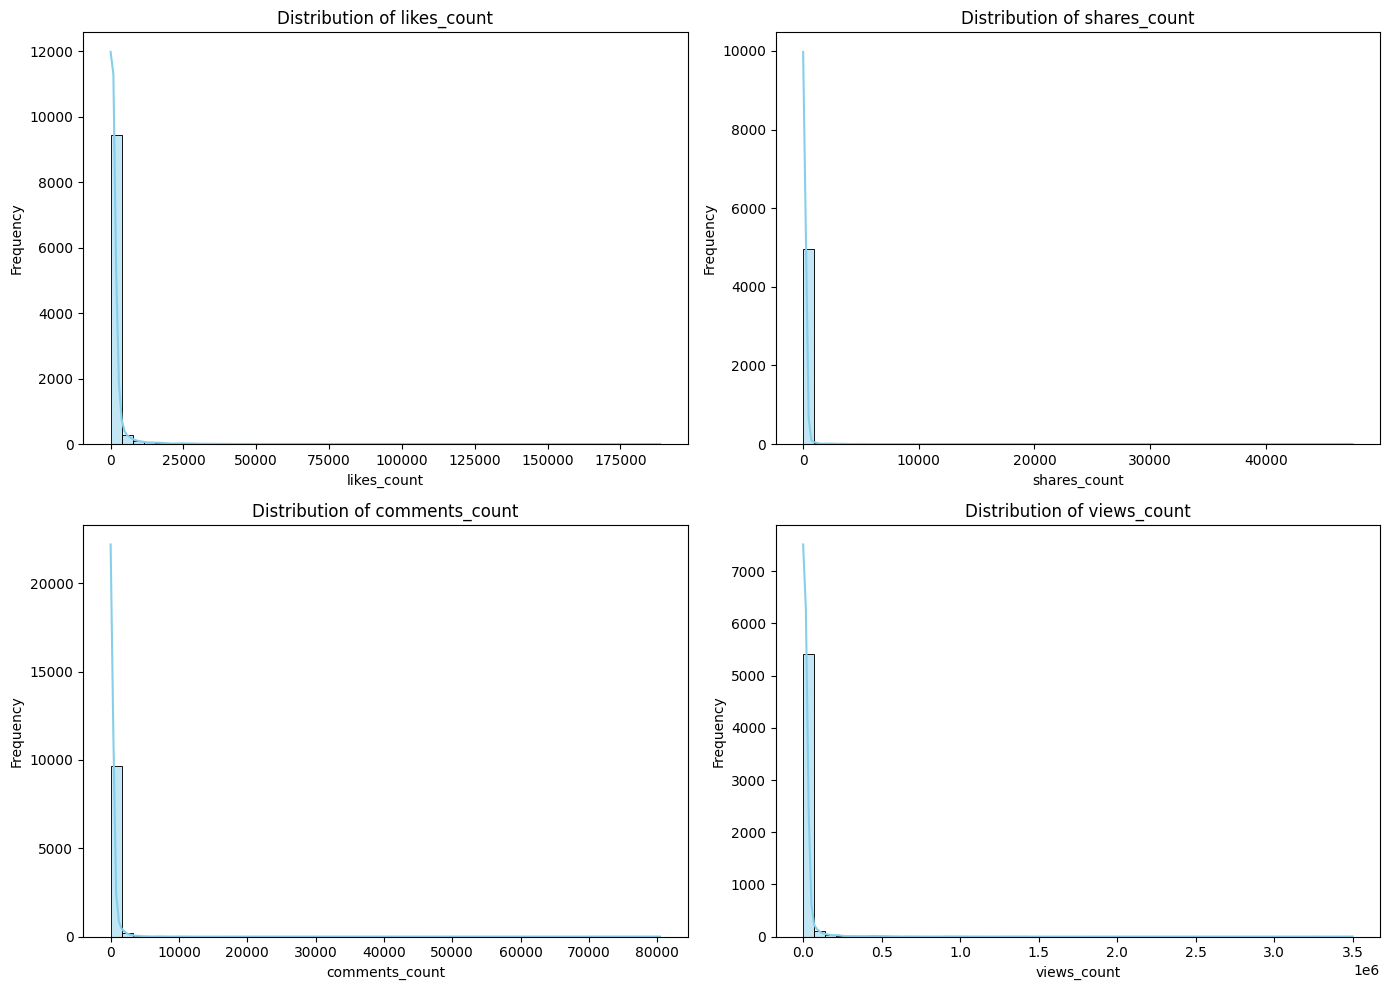

In [105]:
# Visualize Distributions of Key Metrics
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color="skyblue", bins=50)
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

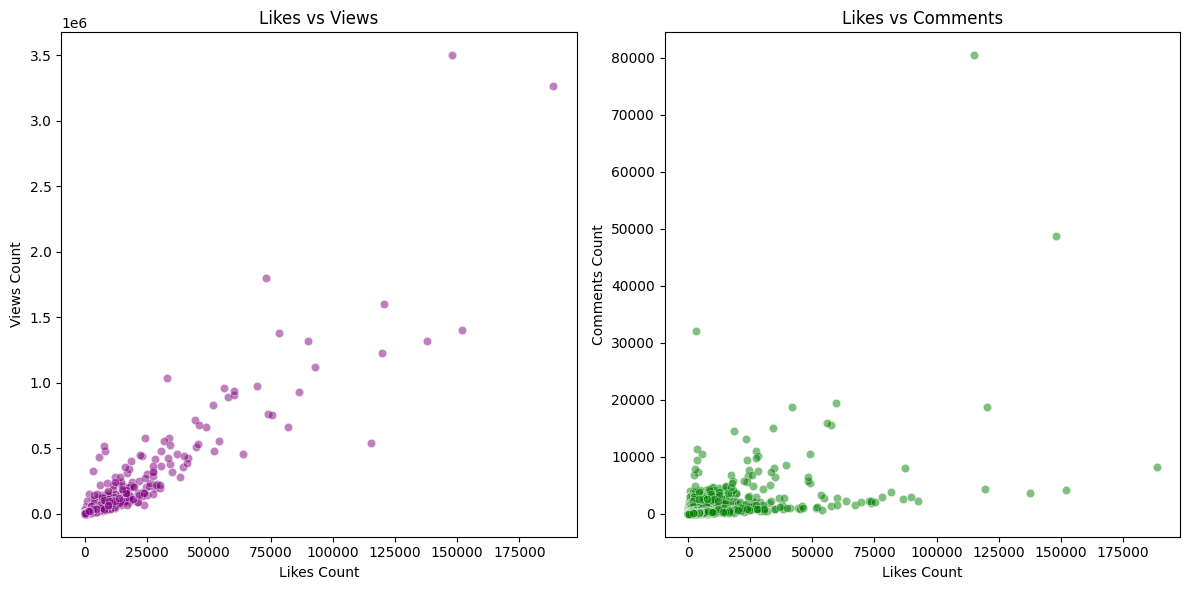

In [106]:
# Relationships Between Metrics
plt.figure(figsize=(12, 6))

# Likes vs Views
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="likes_count", y="views_count", alpha=0.5, color="purple")
plt.title("Likes vs Views", fontsize=12)
plt.xlabel("Likes Count")
plt.ylabel("Views Count")

# Likes vs Comments
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x="likes_count", y="comments_count", alpha=0.5, color="green")
plt.title("Likes vs Comments", fontsize=12)
plt.xlabel("Likes Count")
plt.ylabel("Comments Count")

plt.tight_layout()
plt.show()

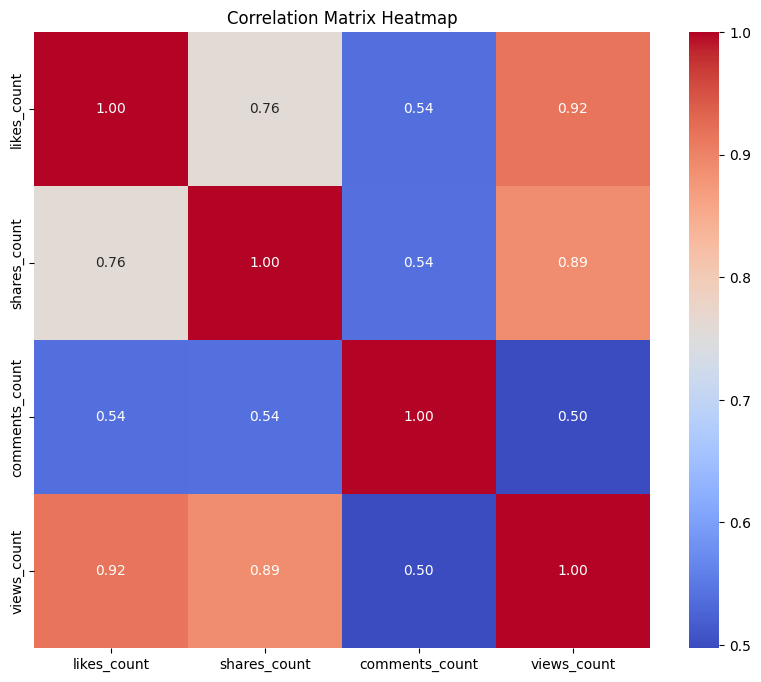

In [117]:
corr_matrix = data.corr(numeric_only=True) # In our dataset, the high correlation between views_count and likes_count may indicate that more views often lead to more likes. 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()